In [1]:
import io

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

## Diffusion

### Strong

In [161]:
CH = pd.read_csv("results/fast/cahn_hilliard.py.tsv", delimiter="\t", index_col=False)

CH

/var/folders/yc/1ssnjn654bs1n_0rts218cn0000j9v/T/ipykernel_82450/1592442270.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  CH = pd.read_csv("results/fast/cahn_hilliard.py.tsv", delimiter="\t", index_col=False)


,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,elapsed4,elapsed5,elapsed6,elapsed7,elapsed8,elapsed9
0,4,10,10,10,5,petsc,2.100985,2.429331,2.729084,2.966225,3.249054,3.494141,3.746356,3.973697,4.199421,4.422478
1,1,10,10,10,5,petsc,2.308931,2.722743,3.050777,3.358134,3.663761,3.969912,4.269095,4.566219,4.868304,5.168905
2,2,10,10,10,5,petsc,2.330669,2.795789,3.173659,3.531903,3.894680,4.251227,4.604335,4.962843,5.327380,5.687954
3,8,10,10,10,5,petsc,1.384888,1.741388,1.997257,2.250359,2.495973,2.741729,3.026412,3.459613,3.875906,4.239695
4,16,10,10,10,5,petsc,1.499459,1.887994,2.349164,2.809113,3.209167,3.621107,4.018319,4.407135,4.807630,5.210971
5,2,10,10,10,5,petsc,1.230675,1.523732,1.747988,1.975618,2.180376,2.382931,2.585392,2.787250,2.989082,3.190541
6,4,10,10,10,5,petsc,1.056553,1.367906,1.601762,1.836058,2.052174,2.270311,2.491863,2.710012,2.927854,3.145087
7,8,10,10,10,5,petsc,1.091310,1.422599,1.674218,1.926014,2.173780,2.421993,2.669566,2.916378,3.164409,3.411972
8,16,10,10,10,5,petsc,1.009650,1.343002,1.613948,1.882229,2.151179,2.419186,2.687468,2.957479,3.227446,3.495845
9,16,10,10,10,5,petsc,4.899467,5.301117,5.586967,5.870491,6.147069,6.423133,6.701917,6.979275,7.257681,7.535319


In [162]:
for n in range(1,10):
    CH[f"delta{n}"] = CH[f"elapsed{n}"] - CH[f"elapsed{n-1}"]

In [163]:
where = (CH["nx"] == 1000) & (CH["ny"] == 1000)
CH.loc[where]

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,...,elapsed9,delta1,delta2,delta3,delta4,delta5,delta6,delta7,delta8,delta9
14,64,1000,1000,10,5,petsc,36.925680,89.800555,142.656739,195.606111,...,513.085927,52.874875,52.856185,52.949372,52.727920,52.860798,52.866189,52.886118,53.135671,53.003120
15,32,1000,1000,10,5,petsc,20.412741,68.426082,116.432778,164.297087,...,451.898518,48.013340,48.006696,47.864309,48.074983,47.869161,47.842844,47.887656,47.895650,48.031137
16,16,1000,1000,10,5,petsc,19.843129,73.514985,126.752256,180.055041,...,501.479943,53.671856,53.237272,53.302785,53.621135,53.722540,53.546757,53.663223,53.443452,53.427795
17,8,1000,1000,10,5,petsc,20.872308,102.735892,183.174904,263.223179,...,742.868983,81.863584,80.439012,80.048275,80.251441,79.834340,79.839386,79.797233,79.848099,80.075303
18,4,1000,1000,10,5,petsc,23.360089,164.160090,304.212103,443.207836,...,1279.114673,140.800000,140.052014,138.995733,139.936643,139.062625,139.434983,139.187734,139.390366,138.894484
19,2,1000,1000,10,5,petsc,28.094137,322.591047,616.160828,908.889629,...,2664.405396,294.496910,293.569781,292.728801,292.649184,292.706822,293.004685,292.898482,292.236871,292.019722
41,1,1000,1000,6,5,petsc,37.246389,574.062342,1106.578423,1638.972952,...,NaN,536.815953,532.516081,532.394529,532.958887,531.649356,532.126078,NaN,NaN,NaN


In [164]:
column = "delta6"
t1 = CH.loc[where & (CH["nproc"] == 1), column].iloc[0]
CH.loc[where, "speedup"] = t1 / df.loc[where, column] 
CH

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,...,delta1,delta2,delta3,delta4,delta5,delta6,delta7,delta8,delta9,speedup
0,4,10,10,10,5,petsc,2.100985,2.429331,2.729084,2.966225,...,0.328346,0.299753,0.237141,0.282829,0.245086,0.252215,0.227342,0.225724,0.223057,NaN
1,1,10,10,10,5,petsc,2.308931,2.722743,3.050777,3.358134,...,0.413811,0.328035,0.307357,0.305627,0.306151,0.299182,0.297124,0.302084,0.300602,NaN
2,2,10,10,10,5,petsc,2.330669,2.795789,3.173659,3.531903,...,0.465120,0.377870,0.358245,0.362776,0.356548,0.353108,0.358508,0.364537,0.360574,NaN
3,8,10,10,10,5,petsc,1.384888,1.741388,1.997257,2.250359,...,0.356500,0.255868,0.253102,0.245614,0.245755,0.284683,0.433201,0.416293,0.363789,NaN
4,16,10,10,10,5,petsc,1.499459,1.887994,2.349164,2.809113,...,0.388535,0.461169,0.459949,0.400054,0.411940,0.397212,0.388817,0.400494,0.403341,NaN
5,2,10,10,10,5,petsc,1.230675,1.523732,1.747988,1.975618,...,0.293057,0.224256,0.227630,0.204758,0.202555,0.202462,0.201858,0.201833,0.201459,NaN
6,4,10,10,10,5,petsc,1.056553,1.367906,1.601762,1.836058,...,0.311354,0.233856,0.234296,0.216116,0.218137,0.221552,0.218149,0.217842,0.217233,NaN
7,8,10,10,10,5,petsc,1.091310,1.422599,1.674218,1.926014,...,0.331289,0.251619,0.251797,0.247765,0.248214,0.247572,0.246812,0.248031,0.247563,NaN
8,16,10,10,10,5,petsc,1.009650,1.343002,1.613948,1.882229,...,0.333352,0.270946,0.268281,0.268951,0.268007,0.268282,0.270010,0.269968,0.268399,NaN
9,16,10,10,10,5,petsc,4.899467,5.301117,5.586967,5.870491,...,0.401650,0.285850,0.283524,0.276578,0.276064,0.278784,0.277358,0.278407,0.277638,NaN


In [259]:
def strong_speedup(df, column):
    t1 = df.loc[df["nproc"] == 1, column].iloc[0]
    return t1 / df[column]

In [260]:
def weak_speedup(df, column):
    t1 = df.loc[df["nproc"] == 1, column].iloc[0]
    return t1 * df["nproc"] / df[column]

In [261]:
def plot_scaling(data, speedup, column, fit_fn, trunc=[], title=""):
    df = data.copy()
    df["speedup"] = speedup(df, column)

    ndata = np.linspace(1, df["nproc"].max(), 100)
    
    ax = df.plot(x="nproc", y="speedup", marker="o", linestyle="")

    for data in [df[df["nproc"] < t] for t in [np.inf] + trunc]:
        popt, pcov = curve_fit(fit_fn, data["nproc"], data["speedup"])
        ax.plot(ndata, fit_fn(ndata, *popt), '-',
                label="fit: serial ={:5.1%}".format(*popt))

    plt.legend()
    plt.title(title)
    plt.ylim(bottom=0, top=df["speedup"].max() * 1.1)

In [262]:
def amdahl(n, s):
    return 1 / (s + (1 - s) / n)

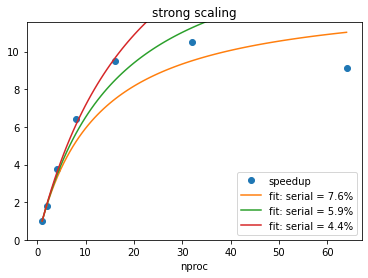

In [263]:
plot_scaling(CH.loc[(CH["nx"] == 1000) & (CH["ny"] == 1000)], 
             speedup=strong_speedup, fit_fn=amdahl, column="elapsed6",
             trunc=[64, 32], title="strong scaling")

### Weak

In [248]:
def gustafson(n, s):
    return s + (1 - s) * n

In [276]:
CH.loc[CH["nx"] * CH["ny"] / CH["nproc"] == 125 * 125]

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,...,delta2,delta3,delta4,delta5,delta6,delta7,delta8,delta9,speedup,weak_size
14,64,1000,1000,10,5,petsc,36.925680,89.800555,142.656739,195.606111,...,52.856185,52.949372,52.727920,52.860798,52.866189,52.886118,53.135671,53.003120,10.065528,15625.0
26,16,500,500,10,5,petsc,7.367905,18.607954,29.680096,40.737801,...,11.072142,11.057705,11.059888,11.057447,11.063525,11.064609,11.063766,11.223313,NaN,15625.0
33,4,250,250,10,5,petsc,2.808435,8.819026,14.688680,20.727394,...,5.869654,6.038714,6.094448,6.034790,5.930696,5.863876,5.856753,5.931292,NaN,15625.0
40,1,125,125,10,5,petsc,1.404970,6.613085,11.741949,16.867585,...,5.128864,5.125636,5.127880,5.128643,5.130699,5.126943,5.127915,5.123841,NaN,15625.0


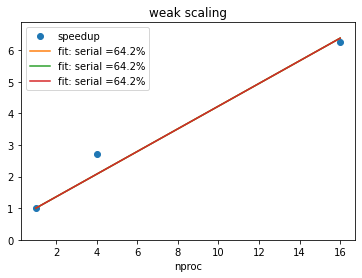

In [279]:
plot_scaling(CH.loc[CH["nx"] * CH["ny"] / CH["nproc"] == 250 * 250], 
             speedup=weak_speedup, fit_fn=gustafson, column="delta9",
             trunc=[64, 32], title="weak scaling")

In [38]:
import os

In [168]:
CH["weak_size"] = CH["nx"] * CH["ny"] / CH["nproc"]
CH

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,...,delta2,delta3,delta4,delta5,delta6,delta7,delta8,delta9,speedup,weak_size
0,4,10,10,10,5,petsc,2.100985,2.429331,2.729084,2.966225,...,0.299753,0.237141,0.282829,0.245086,0.252215,0.227342,0.225724,0.223057,NaN,25.000000
1,1,10,10,10,5,petsc,2.308931,2.722743,3.050777,3.358134,...,0.328035,0.307357,0.305627,0.306151,0.299182,0.297124,0.302084,0.300602,NaN,100.000000
2,2,10,10,10,5,petsc,2.330669,2.795789,3.173659,3.531903,...,0.377870,0.358245,0.362776,0.356548,0.353108,0.358508,0.364537,0.360574,NaN,50.000000
3,8,10,10,10,5,petsc,1.384888,1.741388,1.997257,2.250359,...,0.255868,0.253102,0.245614,0.245755,0.284683,0.433201,0.416293,0.363789,NaN,12.500000
4,16,10,10,10,5,petsc,1.499459,1.887994,2.349164,2.809113,...,0.461169,0.459949,0.400054,0.411940,0.397212,0.388817,0.400494,0.403341,NaN,6.250000
5,2,10,10,10,5,petsc,1.230675,1.523732,1.747988,1.975618,...,0.224256,0.227630,0.204758,0.202555,0.202462,0.201858,0.201833,0.201459,NaN,50.000000
6,4,10,10,10,5,petsc,1.056553,1.367906,1.601762,1.836058,...,0.233856,0.234296,0.216116,0.218137,0.221552,0.218149,0.217842,0.217233,NaN,25.000000
7,8,10,10,10,5,petsc,1.091310,1.422599,1.674218,1.926014,...,0.251619,0.251797,0.247765,0.248214,0.247572,0.246812,0.248031,0.247563,NaN,12.500000
8,16,10,10,10,5,petsc,1.009650,1.343002,1.613948,1.882229,...,0.270946,0.268281,0.268951,0.268007,0.268282,0.270010,0.269968,0.268399,NaN,6.250000
9,16,10,10,10,5,petsc,4.899467,5.301117,5.586967,5.870491,...,0.285850,0.283524,0.276578,0.276064,0.278784,0.277358,0.278407,0.277638,NaN,6.250000


In [170]:
gr = CH.groupby("weak_size")

In [171]:
dict((k, len(g)) for k, g in gr.groups.items())

{6.25: 3,
 12.5: 3,
 25.0: 3,
 50.0: 3,
 100.0: 2,
 244.140625: 1,
 488.28125: 1,
 976.5625: 2,
 1953.125: 2,
 3906.25: 3,
 7812.5: 3,
 15625.0: 4,
 31250.0: 3,
 62500.0: 3,
 125000.0: 2,
 250000.0: 2,
 500000.0: 1,
 1000000.0: 1}

In [272]:
31250 ** .5

176.7766952966369

In [172]:
weak_125 = gr.get_group(15625.0).copy()
weak_125

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,...,delta2,delta3,delta4,delta5,delta6,delta7,delta8,delta9,speedup,weak_size
14,64,1000,1000,10,5,petsc,36.925680,89.800555,142.656739,195.606111,...,52.856185,52.949372,52.727920,52.860798,52.866189,52.886118,53.135671,53.003120,10.065528,15625.0
26,16,500,500,10,5,petsc,7.367905,18.607954,29.680096,40.737801,...,11.072142,11.057705,11.059888,11.057447,11.063525,11.064609,11.063766,11.223313,NaN,15625.0
33,4,250,250,10,5,petsc,2.808435,8.819026,14.688680,20.727394,...,5.869654,6.038714,6.094448,6.034790,5.930696,5.863876,5.856753,5.931292,NaN,15625.0
40,1,125,125,10,5,petsc,1.404970,6.613085,11.741949,16.867585,...,5.128864,5.125636,5.127880,5.128643,5.130699,5.126943,5.127915,5.123841,NaN,15625.0


In [173]:
weak_125["speedup"] = weak_125.loc[weak_125["nproc"] == 1, "elapsed9"].iloc[0] / weak_125["elapsed9"]

In [174]:
weak_125

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,...,delta2,delta3,delta4,delta5,delta6,delta7,delta8,delta9,speedup,weak_size
14,64,1000,1000,10,5,petsc,36.925680,89.800555,142.656739,195.606111,...,52.856185,52.949372,52.727920,52.860798,52.866189,52.886118,53.135671,53.003120,0.092837,15625.0
26,16,500,500,10,5,petsc,7.367905,18.607954,29.680096,40.737801,...,11.072142,11.057705,11.059888,11.057447,11.063525,11.064609,11.063766,11.223313,0.444051,15625.0
33,4,250,250,10,5,petsc,2.808435,8.819026,14.688680,20.727394,...,5.869654,6.038714,6.094448,6.034790,5.930696,5.863876,5.856753,5.931292,0.843978,15625.0
40,1,125,125,10,5,petsc,1.404970,6.613085,11.741949,16.867585,...,5.128864,5.125636,5.127880,5.128643,5.130699,5.126943,5.127915,5.123841,1.000000,15625.0


<AxesSubplot:xlabel='nproc'>

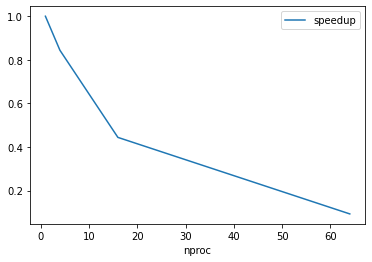

In [245]:
weak_125.plot("nproc", "speedup")

## Diffusion

### Strong

In [176]:
DF = pd.read_csv("results/fast/diffusion.py.tsv", delimiter="\t", index_col=False)

DF

/var/folders/yc/1ssnjn654bs1n_0rts218cn0000j9v/T/ipykernel_82450/2973257344.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  DF = pd.read_csv("results/fast/diffusion.py.tsv", delimiter="\t", index_col=False)


,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,elapsed4,elapsed5
0,64,1000,1000,6,5,petsc,42.095546,45.339540,48.426216,51.475927,54.531696,57.598800
1,32,1000,1000,6,5,petsc,21.073044,23.705837,26.253190,28.689766,31.115528,33.540638
2,16,1000,1000,6,5,petsc,19.955411,23.489613,26.448752,29.379532,32.306719,35.228229
3,8,1000,1000,6,5,petsc,23.709642,28.754247,33.281897,37.768409,42.244249,46.745093
4,4,1000,1000,6,5,petsc,23.317634,32.222118,40.633847,49.097627,57.658939,66.068600
5,2,1000,1000,6,5,petsc,28.342922,46.304248,63.680118,81.323364,98.602529,115.908730
6,1,1000,1000,6,5,petsc,39.660501,66.463253,91.959406,117.473972,142.979278,168.560136


In [179]:
for n in range(1,6):
    DF[f"delta{n}"] = DF[f"elapsed{n}"] - DF[f"elapsed{n-1}"]

In [184]:
where = (DF["nx"] == 1000) & (DF["ny"] == 1000)
DF.loc[where]

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,elapsed4,elapsed5,delta1,delta2,delta3,delta4,delta5,speedup
0,64,1000,1000,6,5,petsc,42.095546,45.339540,48.426216,51.475927,54.531696,57.598800,3.243994,3.086676,3.049711,3.055769,3.067104,0.790684
1,32,1000,1000,6,5,petsc,21.073044,23.705837,26.253190,28.689766,31.115528,33.540638,2.632794,2.547353,2.436576,2.425762,2.425110,1.000000
2,16,1000,1000,6,5,petsc,19.955411,23.489613,26.448752,29.379532,32.306719,35.228229,3.534201,2.959139,2.930780,2.927187,2.921510,0.830088
3,8,1000,1000,6,5,petsc,23.709642,28.754247,33.281897,37.768409,42.244249,46.745093,5.044605,4.527650,4.486512,4.475840,4.500844,0.538812
4,4,1000,1000,6,5,petsc,23.317634,32.222118,40.633847,49.097627,57.658939,66.068600,8.904485,8.411729,8.463780,8.561311,8.409661,0.288372
5,2,1000,1000,6,5,petsc,28.342922,46.304248,63.680118,81.323364,98.602529,115.908730,17.961326,17.375869,17.643246,17.279165,17.306201,0.140130
6,1,1000,1000,6,5,petsc,39.660501,66.463253,91.959406,117.473972,142.979278,168.560136,26.802752,25.496153,25.514565,25.505306,25.580858,0.094802


In [209]:
def speedup(df, where, column):
    t1 = df.loc[where & (df["nproc"] == 1), column].iloc[0]
    return t1 / df.loc[where, column]

In [210]:
DF.loc[where, "speedup"] = speedup(DF, where, "delta5")
DF

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,elapsed4,elapsed5,delta1,delta2,delta3,delta4,delta5,speedup
0,64,1000,1000,6,5,petsc,42.095546,45.339540,48.426216,51.475927,54.531696,57.598800,3.243994,3.086676,3.049711,3.055769,3.067104,8.340394
1,32,1000,1000,6,5,petsc,21.073044,23.705837,26.253190,28.689766,31.115528,33.540638,2.632794,2.547353,2.436576,2.425762,2.425110,10.548329
2,16,1000,1000,6,5,petsc,19.955411,23.489613,26.448752,29.379532,32.306719,35.228229,3.534201,2.959139,2.930780,2.927187,2.921510,8.756039
3,8,1000,1000,6,5,petsc,23.709642,28.754247,33.281897,37.768409,42.244249,46.745093,5.044605,4.527650,4.486512,4.475840,4.500844,5.683569
4,4,1000,1000,6,5,petsc,23.317634,32.222118,40.633847,49.097627,57.658939,66.068600,8.904485,8.411729,8.463780,8.561311,8.409661,3.041842
5,2,1000,1000,6,5,petsc,28.342922,46.304248,63.680118,81.323364,98.602529,115.908730,17.961326,17.375869,17.643246,17.279165,17.306201,1.478133
6,1,1000,1000,6,5,petsc,39.660501,66.463253,91.959406,117.473972,142.979278,168.560136,26.802752,25.496153,25.514565,25.505306,25.580858,1.000000


In [208]:
column = "delta5"
t1 = DF.loc[where & (DF["nproc"] == 1), column].iloc[0]
DF.loc[where, "speedup"] = t1 / DF.loc[where, column]
DF

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,elapsed4,elapsed5,delta1,delta2,delta3,delta4,delta5,speedup
0,64,1000,1000,6,5,petsc,42.095546,45.339540,48.426216,51.475927,54.531696,57.598800,3.243994,3.086676,3.049711,3.055769,3.067104,8.340394
1,32,1000,1000,6,5,petsc,21.073044,23.705837,26.253190,28.689766,31.115528,33.540638,2.632794,2.547353,2.436576,2.425762,2.425110,10.548329
2,16,1000,1000,6,5,petsc,19.955411,23.489613,26.448752,29.379532,32.306719,35.228229,3.534201,2.959139,2.930780,2.927187,2.921510,8.756039
3,8,1000,1000,6,5,petsc,23.709642,28.754247,33.281897,37.768409,42.244249,46.745093,5.044605,4.527650,4.486512,4.475840,4.500844,5.683569
4,4,1000,1000,6,5,petsc,23.317634,32.222118,40.633847,49.097627,57.658939,66.068600,8.904485,8.411729,8.463780,8.561311,8.409661,3.041842
5,2,1000,1000,6,5,petsc,28.342922,46.304248,63.680118,81.323364,98.602529,115.908730,17.961326,17.375869,17.643246,17.279165,17.306201,1.478133
6,1,1000,1000,6,5,petsc,39.660501,66.463253,91.959406,117.473972,142.979278,168.560136,26.802752,25.496153,25.514565,25.505306,25.580858,1.000000


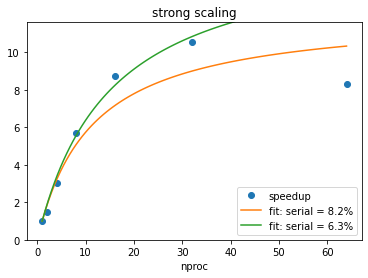

In [247]:
plot_scaling(DF.loc[(DF["nx"] == 1000) & (DF["ny"] == 1000)], amdahl,
             trunc=[64], title="strong scaling")